In [ ]:
# import cv2
# from google.colab.patches import cv2_imshow

# # Read the image
# image = cv2.imread('./take_a_delicious_coffee_test.png')

# # Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply thresholding to segment the text from the background
# _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# # Find contours
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Iterate through contours and draw rectangles around text regions
# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# # Display the result
# cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# #누끼따기

# # import cv2

# # # Read the image
# # image = cv2.imread('/content/take_a_delicious_coffee_test.png')

# # # Convert the image to grayscale
# # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # # Apply background subtraction (example: using a simple threshold)
# # _, binary_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# # # Invert the binary mask
# # binary_mask = cv2.bitwise_not(binary_mask)

# # # Apply the mask to the original image
# # foreground = cv2.bitwise_and(image, image, mask=binary_mask)

# # # Save the resulting image with the background removed
# # cv2.imwrite('foreground_only.jpg', foreground)

# import cv2

# # Read the image
# image = cv2.imread('/content/take_a_delicious_coffee_test.png')

# # Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply background subtraction (example: using a simple threshold)
# _, binary_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

# # Invert the binary mask
# binary_mask = cv2.bitwise_not(binary_mask)

# # Keep only the text portion by applying the binary mask
# text_only = cv2.bitwise_and(image, image, mask=binary_mask)

# # Save the resulting image with only the text
# cv2.imwrite('text_only.png', text_only)

In [ ]:
# #합성하기

# import cv2

# # Read the foreground image (with background removed)
# foreground = cv2.imread('/content/text_only.png')

# # Read the background image
# background = cv2.imread('/content/salad_onthe_browntable.png')

# # Get the dimensions of the foreground image
# foreground_height, foreground_width, _ = foreground.shape

# # Define the region of interest (ROI) on the background image
# roi = background[0:foreground_height, 0:foreground_width]

# # Replace the ROI with the foreground image
# roi[:1024, :1024] = foreground[:1024, :1024]

# # Save the resulting composite image
# cv2.imwrite('composite_image.jpg', background)

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

back_image = cv2.imread('/content/salad_onthe_browntable.png')
text_image = cv2.imread('/content/take_a_delicious_coffee_test(2).png')

#배경이미지 사이즈 변경
# text_image_resize = cv2.resize(text_image, (700, 400))
text_image_resize = cv2.resize(text_image, (400, 400)) #텍스트 이미지가 1:1 비율일 시

# # 이미지 해상도 체크
# print(back_image.shape)
# print(text_image_resize.shape)

In [ ]:
# 텍스트 이미지 마스크 생성
gray = cv2.cvtColor(text_image_resize, cv2.COLOR_BGR2GRAY)
_, binary_mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

#변수 단순화
dst = back_image
src = text_image_resize
mask = binary_mask

#배경, 텍스트 가로, 세로 길이 변수에 저장
dst_h,dst_w = dst.shape[:2]
src_h,src_w = src.shape[:2]

#텍스트를 넣고자 하는 위치값 미리 러프하게 저장
crop_centerleft = dst[0:src_h, 0:src_w]
crop_centertop = dst[0:src_h, int(dst_w/2-src_w/2):int(dst_w/2+src_w/2)]
crop_centerright = dst[0:src_h, dst_w-src_w:dst_w]

crop_leftcenter = dst[int(dst_h/2-src_h/2):int(dst_h/2+src_h/2), 0:src_w]
crop_centercenter = dst[int(dst_h/2-src_h/2):int(dst_h/2+src_h/2), int(dst_w/2-src_w/2):int(dst_w/2+src_w/2)]
crop_rightcenter = dst[int(dst_h/2-src_h/2):int(dst_h/2+src_h/2), dst_w-src_w:dst_w]

crop_leftbottom = dst[dst_h-src_h:dst_h, 0:src_w]
crop_centerbottom = dst[dst_h-src_h:dst_h, int(dst_w/2-src_w/2):int(dst_w/2+src_w/2)]
crop_rightbottom = dst[dst_h-src_h:dst_h, dst_w-src_w:dst_w]

#배경에 텍스트 이미지 삽입
# cv2.copyTo(src, mask, crop_centerleft)
cv2.copyTo(src, mask, crop_centertop)
# cv2.copyTo(src, mask, crop_centerright)
# cv2.copyTo(src, mask, crop_leftcenter)
# cv2.copyTo(src, mask, crop_centercenter)
# cv2.copyTo(src, mask, crop_rightcenter)
cv2.copyTo(src, mask, crop_leftbottom)
# cv2.copyTo(src, mask, crop_centerbottom)
cv2.copyTo(src, mask, crop_rightbottom)

#이미지 출력
cv2_imshow(dst)

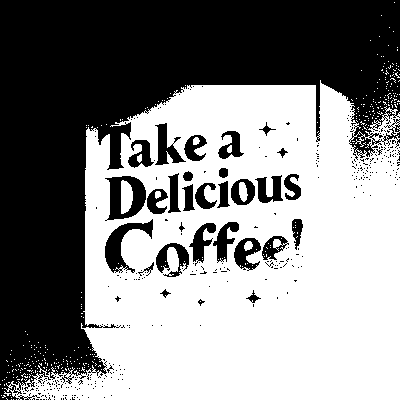

In [ ]:
# Create a black canvas with the same size as dst image
canvas = np.zeros_like(back_image)

# Define the position to place the src image on top of the canvas image (top center)
src_width, src_height = text_image_resize.shape[1], text_image_resize.shape[0]
canvas_width, canvas_height = canvas.shape[1], canvas.shape[0]
top_left_x = (canvas_width - src_width) // 2
top_left_y = 0

# Calculate the bottom right corner coordinates of src on canvas
bottom_right_x = top_left_x + src_width
bottom_right_y = src_height

# Place the src image on the canvas image at the specified position
canvas[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = text_image_resize

# Create a mask for the src image
gray = cv2.cvtColor(text_image_resize, cv2.COLOR_BGR2GRAY)
_, binary_mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

cv2_imshow(binary_mask)

In [ ]:
# # binary_mask = cv2.bitwise_not(binary_mask)

# # Apply the mask to the src image
# src_masked = cv2.bitwise_and(text_image_resize, text_image_resize, mask=binary_mask)
# # Add the masked src image to the original background image
# result = cv2.add(back_image, canvas, src_masked)

src = canvas
dst = back_image
mask = binary_mask

result = cv2.copyTo(src, mask, dst)

# Display the result
cv2_imshow(result)

error: OpenCV(4.8.0) /io/opencv/modules/core/src/copy.cpp:442: error: (-215:Assertion failed) size() == mask.size() in function 'copyTo'


In [ ]:
print(result.shape)

In [ ]:
# ## 마스크 생성
# gray = cv2.cvtColor(text_image_resize , cv2.COLOR_BGR2GRAY)
# _, binary_mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
# #myimshow(binary_mask)

# binary_mask = cv2.bitwise_not(binary_mask)

# src = text_image_resize
# dst = back_image
# mask = binary_mask

# result = cv2.copyTo(src, mask, dst)

# cv2_imshow(result)

